### Set up

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

In [3]:
# import plotly
# import plotly.graph_objs as go

### import the data and clean the missing values 

In [4]:
movie = pd.read_csv("movie_metadata_1.csv")
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25964 entries, 0 to 25963
Data columns (total 24 columns):
adult                    25964 non-null bool
belongs_to_collection    3743 non-null object
budget                   25964 non-null int64
genres                   25964 non-null object
homepage                 5423 non-null object
id                       25964 non-null int64
imdb_id                  25960 non-null object
original_language        25962 non-null object
original_title           25964 non-null object
overview                 25764 non-null object
popularity               25964 non-null float64
poster_path              25963 non-null object
production_companies     25964 non-null object
production_countries     25964 non-null object
release_date             25961 non-null object
revenue                  25964 non-null int64
runtime                  25942 non-null float64
spoken_languages         25964 non-null object
status                   25958 non-null object
tag

In [5]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",...,7/14/2010,825532764,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075
1,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,7/16/2008,1004558444,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269
2,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,12/10/2009,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114
3,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,4/25/2012,1519557910,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000
4,False,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.foxmovies.com/movies/deadpool,293660,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,...,2/9/2016,783112979,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,False,7.4,11444


In [6]:
movie.shape

(25964, 24)

In [7]:
movie = movie.set_index("title", drop = True)

In [8]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Inception,False,NaN,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",7/14/2010,825532764,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,False,8.1,14075
The Dark Knight,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",7/16/2008,1004558444,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,False,8.3,12269
Avatar,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/10/2009,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,False,7.2,12114
The Avengers,False,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",4/25/2012,1519557910,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,False,7.4,12000
Deadpool,False,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.foxmovies.com/movies/deadpool,293660,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/9/2016,783112979,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,False,7.4,11444


In [9]:
movie['genres'] = movie['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie['production_countries'] = movie['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie['production_companies'] = movie['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [10]:
movie.isnull().sum()

adult                        0
belongs_to_collection    22221
budget                       0
genres                       0
homepage                 20541
id                           0
imdb_id                      4
original_language            2
original_title               0
overview                   200
popularity                   0
poster_path                  1
production_companies         0
production_countries         0
release_date                 3
revenue                      0
runtime                     22
spoken_languages             0
status                       6
tagline                  11298
video                        0
vote_average                 0
vote_count                   0
dtype: int64

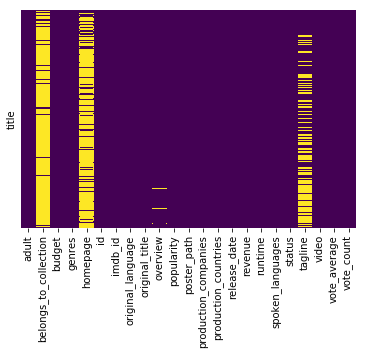

In [84]:
sns.heatmap(movie.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [11]:
# drop the columns that do not seem interesting or relevant 
movie_clean = movie.drop(['tagline', 'homepage','imdb_id', 'poster_path', 'original_title', 'overview', 'status', 'video', 'adult'], axis = 1)

In [12]:
# we want to see if there is any 0 values for budget and revenues 
movie_clean[movie_clean['budget'] == 0]['budget'].count()

18117

In [13]:
movie_clean[movie_clean['revenue'] == 0]['revenue'].count()

19014

In [14]:
# we should input NA values for revenues when both budget and revenue are 0 
# we should input NA values for budget when budget is 0
# but we are gonna leave the ones that have budget value but no revenue value

movie_clean.loc[(movie_clean['budget'] == 0) & (movie_clean['revenue'] == 0), 'revenue'] = np.nan
movie_clean.loc[movie_clean['budget'] == 0,'budget'] = np.nan

In [15]:
movie_clean.isnull().sum()

belongs_to_collection    22221
budget                   18117
genres                       0
id                           0
original_language            2
popularity                   0
production_companies         0
production_countries         0
release_date                 3
revenue                  16360
runtime                     22
spoken_languages             0
vote_average                 0
vote_count                   0
dtype: int64

In [16]:
movie_clean = movie_clean.dropna()

In [17]:
# we want to add a net profit column as well 
movie_clean['profit'] = movie_clean['revenue'] - movie_clean['budget']

In [18]:
movie_clean.head()

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,profit
title,,,,,,,,,,,,,,,
The Dark Knight,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000.0,"[Drama, Action, Crime, Thriller]",155,en,123.167259,"[DC Comics, Legendary Pictures, Warner Bros., ...","[United Kingdom, United States of America]",7/16/2008,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",8.3,12269,8.195584e+08
Avatar,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,185.070892,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",12/10/2009,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",7.2,12114,2.550965e+09
The Avengers,"{'id': 86311, 'name': 'The Avengers Collection...",220000000.0,"[Science Fiction, Action, Adventure]",24428,en,89.887648,"[Paramount Pictures, Marvel Studios]",[United States of America],4/25/2012,1.519558e+09,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.4,12000,1.299558e+09
Deadpool,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000.0,"[Action, Adventure, Comedy]",293660,en,187.860492,"[Twentieth Century Fox Film Corporation, Marve...",[United States of America],2/9/2016,7.831130e+08,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.4,11444,7.251130e+08
Guardians of the Galaxy,"{'id': 284433, 'name': 'Guardians of the Galax...",170000000.0,"[Action, Science Fiction, Adventure]",118340,en,53.291601,"[Marvel Studios, Moving Picture Company (MPC),...","[United Kingdom, United States of America]",7/30/2014,7.733286e+08,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.9,10014,6.033286e+08


### explortatory data analysis

we want to check the corrleation bewteen different variables 

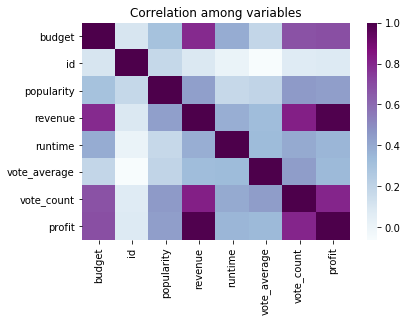

In [19]:
ax = plt.axes()
sns.heatmap(movie_clean.corr(), cmap = 'BuPu')
ax.set_title('Correlation among variables')
plt.show()

As we can see, budget, revenue and votecount are heavily correlated(0.8). 
This makes sense because usually the larger the budget, the bigger the revenue, and also the movie gets a lot of publicity. 

First we want to define a function that count the number of times for different categorical values in certain columns 

In [20]:
def counting_values(df, column):
    value_count = {}
    for row in df[column].dropna():
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

In [21]:
genre = pd.Series(counting_values(movie_clean, 'genres'))
country = pd.Series(counting_values(movie_clean, 'production_countries'))
company = pd.Series(counting_values(movie_clean, 'production_companies'))

We want to look at genre

In [22]:
genre_top15 = genre.sort_values(ascending = False).head(15)

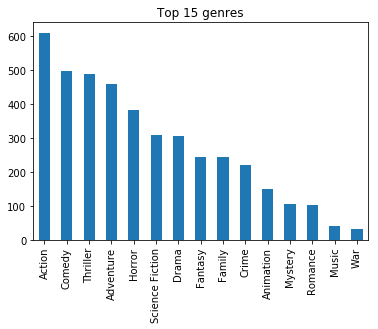

In [23]:
ax = plt.axes()
genre_top15.plot(kind = 'bar')
ax.set_title('Top 15 genres')
plt.show()

In [25]:
genre_top15

Action             610
Comedy             498
Thriller           488
Adventure          460
Horror             381
Science Fiction    308
Drama              305
Fantasy            244
Family             243
Crime              219
Animation          148
Mystery            105
Romance            103
Music               39
War                 31
dtype: int64

we can also look at pruduction companies 

In [26]:
company_top15 = company.sort_values(ascending = False).head(15)

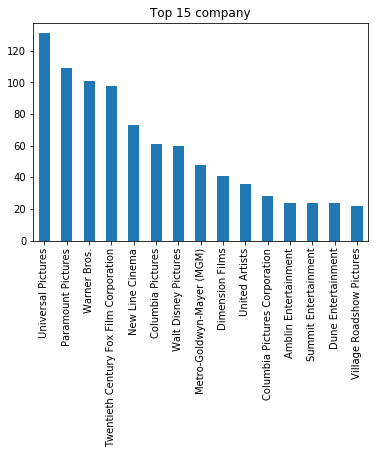

In [27]:
ax = plt.axes()
company_top15.plot(kind = 'bar')
ax.set_title('Top 15 company')
plt.show()

Lets look at countries too

In [28]:
country.head()

United Kingdom               170
United States of America    1281
Australia                     32
China                         26
New Zealand                    8
dtype: int64

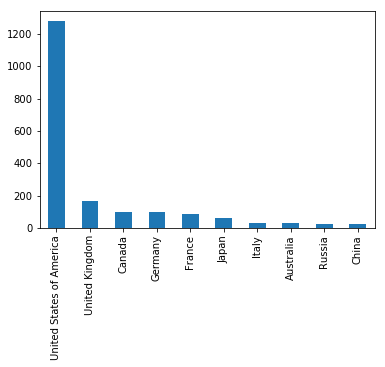

In [87]:
country.sort_values(ascending = False).head(10).plot(kind = 'bar')